
# Projeto 1- Ciência dos dados
Bruno Vieira Sanches
### 1. Análise exploratória sobre os dados disponíveis no Gapminder
Dados selecionados:
1. Porcentagem da população que acessa a internet
2. Porcentagem da população que vive em áreas urbanas

#### Pergunta a ser respondida:
Países com uma maior porcentagem da população com acesso à internet e que vivem em áreas urbanas tendem a ter maior IDH? 

O Índice de Desenvolvimento Humano (IDH) de um país relaciona a expectativa de vida da população, anos médios de estudo, anos esperados de escolaridade e a renda (GDP ou PIB) per capita. O objetivo desse projeto é saber se o IDH sofre influências da quantidade de usuários de internet e da porcentagem da população que vive em áreas urbanas.

### 2. Importando bibliotecas e abrindo os arquivos

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Leitura dos arquivos em Excel baixados do Gapminder

idh = pd.read_excel('hdi_human_development_index.xlsx')
internet_usr = pd.read_excel('internet_users.xlsx')
urban_pop = pd.read_excel('urban_population_percent_of_total.xlsx')

### 3.1 Agrupando os dados de 2015 

In [3]:
#escolhendo só o ano de 2015
idh_2015 = idh.loc[:, ["idh", 2015]]   #.loc acessa as linhas e colunas
internet_usr_2015 = internet_usr.loc[:, ["internet", 2015]]
urban_pop_2015 = urban_pop.loc[:, ["pop", 2015]]

In [4]:
#ajeitando os index e renomeando as colunas
idh_idx = idh_2015.set_index('idh')   #set_index define o nome do país como ID (identificador)
idh_idx.rename(columns={2015:"IDH"},inplace=True)
internet_usr_idx = internet_usr_2015.set_index('internet')
internet_usr_idx.rename(columns={2015:"Internet Users %"},inplace=True)
urban_pop_idx = urban_pop_2015.set_index('pop')
urban_pop_idx.rename(columns={2015:"Urban Pop %"},inplace=True)

In [5]:
df = idh_idx.join(internet_usr_idx, how='inner')
tabela = internet_usr_idx.join(urban_pop_idx, how='inner')
tabela2 = idh_idx.join(urban_pop_idx, how='inner')

In [6]:
data = df.join(urban_pop_idx, how="inner")
data.sort_values(by='IDH').tail()

,IDH,Internet Users %,Urban Pop %
Singapore,0.925,79.0,100.0
Germany,0.926,87.6,75.3
Switzerland,0.939,87.5,73.9
Australia,0.939,84.6,89.4
Norway,0.949,96.8,80.5


### 3.2 Agrupando os dados de 2010

In [7]:
#escolhendo só o ano de 2010
idh_2010 = idh.loc[:, ["idh", 2010]]   #.loc acessa as linhas e colunas
internet_usr_2010 = internet_usr.loc[:, ["internet", 2010]]
urban_pop_2010 = urban_pop.loc[:, ["pop", 2010]]

In [8]:
#ajeitando os index e renomeando as colunas
idh_idx2 = idh_2010.set_index('idh')   #set_index define o nome do país como ID (identificador)
idh_idx2.rename(columns={2010:"IDH"},inplace=True)
internet_usr_idx2 = internet_usr_2010.set_index('internet')
internet_usr_idx2.rename(columns={2010:"Internet Users %"},inplace=True)
urban_pop_idx2 = urban_pop_2010.set_index('pop')
urban_pop_idx2.rename(columns={2010:"Urban Pop %"},inplace=True)

In [9]:
df2 = idh_idx2.join(internet_usr_idx2, how='inner')
tabela3 = internet_usr_idx2.join(urban_pop_idx2, how='inner')
tabela4 = idh_idx2.join(urban_pop_idx2, how='inner')

### 4. Salvando o arquivo em excel

In [10]:
writer = pd.ExcelWriter('Projeto1.xlsx')
data.to_excel(writer,'Sheet1')
writer.save()

In [11]:
dados = pd.read_excel('Projeto1.xlsx')
dados.head()

,IDH,Internet Users %,Urban Pop %
Afghanistan,0.479,8.26,26.7
Albania,0.764,63.30,57.4
Algeria,0.745,38.20,70.7
Andorra,0.858,96.90,85.1
Angola,0.533,12.40,44.0


## 5. Plotando gráficos e tabelas para análise temporal das variáveis 

### 5.1 Internet Users % x Urban Pop % (2015 e 2010)

#### Gráfico de Dispersão

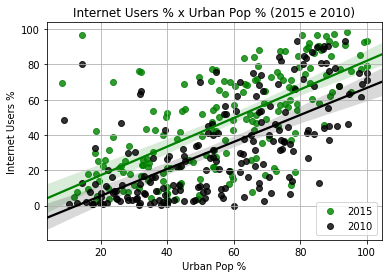

In [31]:
#2015
sns.regplot(tabela["Urban Pop %"],tabela["Internet Users %"], color=('green'), label='2015')
plt.legend()
#2010
sns.regplot(tabela3["Urban Pop %"],tabela3["Internet Users %"], color=('black'), label='2010')
plt.legend()

plt.title('Internet Users % x Urban Pop % (2015 e 2010)')
plt.grid()

In [13]:
tabela.corr()
tabela3.corr()

,Internet Users %,Urban Pop %
Internet Users %,1.000000,0.651053
Urban Pop %,0.651053,1.000000


#### BoxPlot

Text(0.5,1,'2010')

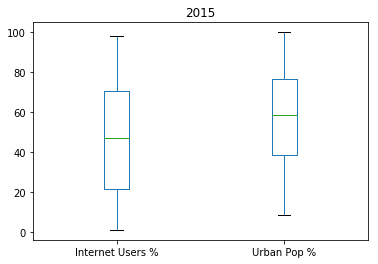

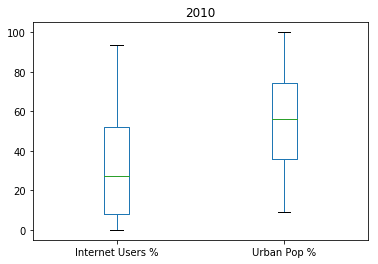

In [14]:
tabela.plot.box()
plt.title('2015')
tabela3.plot.box()
plt.title('2010')

A partir da análise do BoxPlot nota-se que a porcentagem da população que tem acesso à internet tem crescido (mediana foi de aproximadamente 25% em 2010 para 45% em 2015), enquanto a porcentagem da população que vive em áreas urbanas no país permaneceu quase constante. Portanto, diferente do que era pensado no senso comum, o número de usuários de internet tem crescido nas áreas não-urbanas e, dessa forma, as variáveis não estão correlacionadas.

### Outliners

In [15]:
tabela[(tabela['Internet Users %']>=60) & (tabela['Urban Pop %']<=40)]

,Internet Users %,Urban Pop %
internet,,
Antigua and Barbuda,70.0,23.80
Barbados,76.1,31.50
Liechtenstein,96.6,14.30
St. Kitts and Nevis,75.7,32.00
Trinidad and Tobago,69.2,8.45


#### Histogramas e Médias

Média: 57.38160621761658


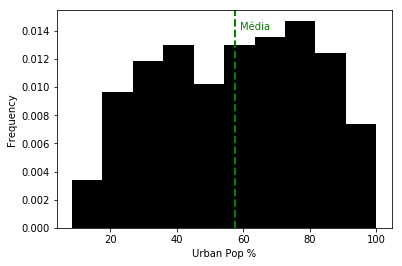

In [16]:
def verticalLine(plot, x, y, color, nome):
    plot.axvline(x, color=color, linestyle="dashed", linewidth=2)
    plot.text(1.03*x, 1.41*y, nome, color=color)    

  
verticalLine(plt, tabela['Urban Pop %'].mean(), 0.01, "g", "Média")
tabela['Urban Pop %'].plot.hist(density=True, color="black");
plt.xlabel('Urban Pop %')

print('Média: {}'.format(tabela['Urban Pop %'].mean()))

Média: 46.73736842105262


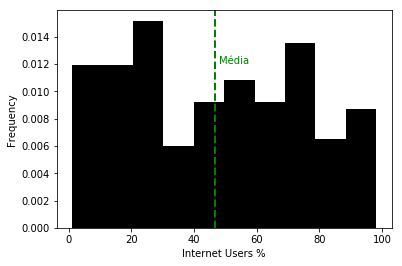

In [17]:
def verticalLine(plot, x, y, color, nome):
    plot.axvline(x, color=color, linestyle="dashed", linewidth=2)
    plot.text(1.03*x, 1.2*y, nome, color=color)    

  
verticalLine(plt, tabela['Internet Users %'].mean(), 0.01, "g", "Média")
tabela['Internet Users %'].plot.hist(density=True, color="black");
plt.xlabel('Internet Users %')

print('Média: {}'.format(tabela['Internet Users %'].mean()))

No gráfico de dispersão alguns países destacam-se por sua distância da linha de tendência, sendo eles os países citados na tabela plotada no início do tópico. As características que compartilham são uma baixa porcentagem de suas populações vivendo em áreas urbanas - média do mundo de 57.3% - e uma alta porcentagem das pessoas tendo acesso a internet. 

Ao estudar mais os países percebe-se que 4 entre os 5 (exceto Liechtenstein, que é um pequeno principado) são ilhas e, por isso, não possuem uma áera urbana abrangente, apesar de possuirem uma rede de internet mais atuante que a média mundial de 46.7%. Ao analizarmos o acesso das populações à internet nesses países ainda encontramos um outliner: Liechtenstein; tal diferença se dá principalmente por se localizar na Europa Central, enquanto os outros são da América Central.

### 5.2 Internet Users % x IDH (2015 e 2010)

#### Gráfico de Disperção

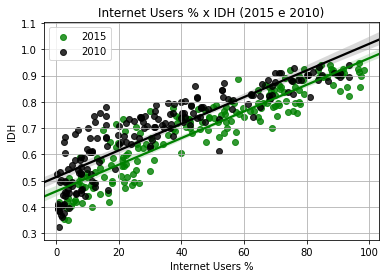

In [30]:
#2015
sns.regplot(df["Internet Users %"],df["IDH"], color=('green'), label='2015')
plt.legend()
#2010
sns.regplot(df2["Internet Users %"],df2["IDH"], color=('black'), label='2010')
plt.legend()
plt.title('Internet Users % x IDH (2015 e 2010)')
plt.grid()

#### Correlações

In [33]:
#2015
df.corr()

,IDH,Internet Users %
IDH,1.000000,0.921838
Internet Users %,0.921838,1.000000


In [34]:
#2010
df2.corr()

,IDH,Internet Users %
IDH,1.000000,0.878508
Internet Users %,0.878508,1.000000


#### BoxPlot

Text(0.5,1,'2010')

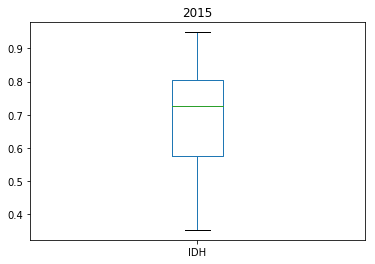

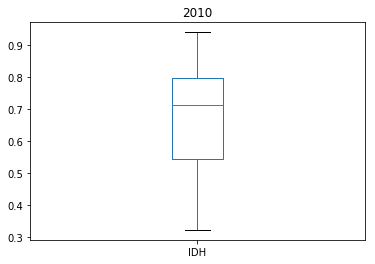

In [21]:
#idh_comparacao = idh_idx.join(idh_idx2)
#plt.subplot(121)
idh_idx.plot.box()
plt.title('2015')
#plt.subplot(122)
idh_idx2.plot.box()
plt.title('2010')
#plt.tight_layout()

Apartir do gráfico de dispersão percebe-se que o IDH e a porcentagem da população com acesso à internet em um determinado país estão muito correlacionados - e essa correlação cresce entre os anos (em 2015 era de 0.92 enquanto em 2010 foi de 0.87). 

Apesar de tal correlação, ao compararmos o crescimento e média do IDH entre 2015 e 2010 percebe-se que o mesmo não sofre grandes alterações, enquanto porcentagem da população com acesso à internet cresce - como analizado no tópico Internet Users x Urban Pop % (2015 e 2010);

Estudando-se a relação entre as variáveis, pode-se concluir que a correlação é real e tal característica citada pode ser explicada por: o IDH possuir uma tendência de crescimento lenta, enquanto a de internet acelerada e os países com maior IDH possuirem uma maior parcela de sua população tendo acesso à rede - por conta de sua estrutura superior nas áreas de comunicação;   por isso a linha de tendência permaneceu paralela e se deslocou para a direita. 

### 5.3 Urban Pop % x IDH (2015 e 2010)

#### Gráficos de Dispersão

Text(0.5,1,'Urban Pop % x IDH (2005)')

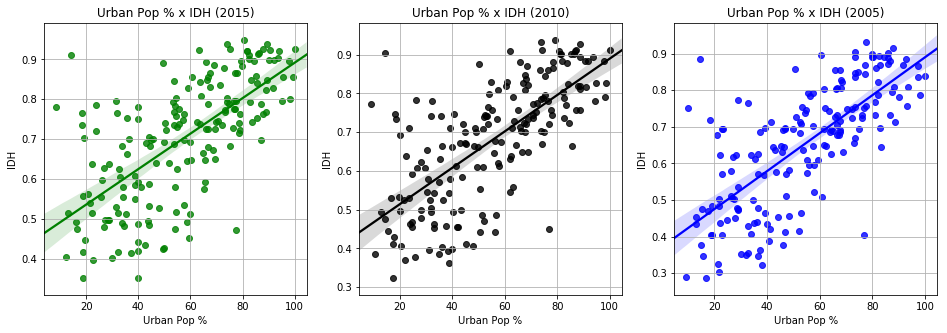

In [22]:
#2015
fig = plt.figure(figsize=(16,5))
plt.subplot(131)
sns.regplot(tabela2["Urban Pop %"],tabela2["IDH"], color=('green'))
plt.grid()
plt.title('Urban Pop % x IDH (2015)')

#2010
plt.subplot(132)
sns.regplot(tabela4["Urban Pop %"],tabela4["IDH"], color=('black'))
plt.grid()
plt.title('Urban Pop % x IDH (2010)')

#2005
idh_2005 = idh.loc[:, ["idh", 2005]]
urban_pop_2005 = urban_pop.loc[:, ["pop", 2005]]
idh_idx4 = idh_2005.set_index('idh')   #set_index define o nome do país como ID (identificador)
idh_idx4.rename(columns={2005:"IDH"},inplace=True)
urban_pop_idx4 = urban_pop_2005.set_index('pop')
urban_pop_idx4.rename(columns={2005:"Urban Pop %"},inplace=True)
tabela6 = idh_idx4.join(urban_pop_idx4, how='inner')


plt.subplot(133)
sns.regplot(tabela6["Urban Pop %"],tabela6["IDH"], color=('blue'))
plt.grid()
plt.title('Urban Pop % x IDH (2005)')



#### Correlações

In [23]:
#2015
tabela2.corr()

,IDH,Urban Pop %
IDH,1.000000,0.669763
Urban Pop %,0.669763,1.000000


In [24]:
#2010
tabela4.corr()

,IDH,Urban Pop %
IDH,1.000000,0.696353
Urban Pop %,0.696353,1.000000


In [25]:
#2005
tabela6.corr()

,IDH,Urban Pop %
IDH,1.000000,0.723923
Urban Pop %,0.723923,1.000000


Analizando o gráfico de dispersão e os valores de correlação entre as variáveis entre os anos de 2015, 2010 e 2005 nota-se que com o passar dos anos sua correlação diminuiu (de 0.723 em 2005 para 0.66 em 2015). Tal comportamento pode ser explicado ao analizarmos os fatores que compoem o calculo do IDH; tais parâmetros eram mais encontrados em centros urbanos - uma melhor educação, saúde pública e renda média da população, contudo, com o passar dos anos as áreas não-urbanas/rurais desenvolveram-se e melhoraram assim a qualidade de vida de seus habitantes. Portanto, apesar de existir uma correlação entre a porcentagem da população que vive em centros urbanos e o IDH, a tendência é que com o passar dos anos tal correlação venha a diminuir de intensidade.

#### Análise Temporal

In [26]:
#1990
idh_1990 = idh.loc[:, ["idh", 1990]]
urban_pop_1990 = urban_pop.loc[:, ["pop", 1990]]
idh_idx6 = idh_1990.set_index('idh')   #set_index define o nome do país como ID (identificador)
idh_idx6.rename(columns={1990:"IDH"},inplace=True)
urban_pop_idx6 = urban_pop_1990.set_index('pop')
urban_pop_idx6.rename(columns={1990:"Urban Pop %"},inplace=True)
tabela8 = idh_idx4.join(urban_pop_idx4, how='inner')

tabela8.corr()

,IDH,Urban Pop %
IDH,1.000000,0.723923
Urban Pop %,0.723923,1.000000


Voltando ainda mais no tempo, 1990, podemos notar que a correlação era ainda maior, como o concluido anteriormente!

## 6. Conclusões

Após analize dos dados fornecidos pelo GapMinder e estudo das variáveis escolhidas, com o objetivo de descobrir se o IDH sofre influências da quantidade de usuários de internet e da porcentagem da população que vive em áreas urbanas, conclui-se que o IDH tanto pode influenciar nas variáveis, como ser influenciado por elas, constituindo assim, correlações. 

Como observado e comentado no decorrer do projeto, nota-se que o IDH influencia na porcentagem da população do país que tem acesso à internet, e que, apesar de estar diminuindo com o desenvolvimento das regiões não-rurais, a porcentagem da população que vive em áreas urbanas influência o IDH, tal qual analizado nas comparações anuais.
